In [2]:
import sys
sys.path.append('..')
from scripts import blazmass_tools
from scripts import dtaselect_QC as qc
from itertools import chain
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

In [3]:
def plot_ppm_vs_scan(dta_file):

    dta = list(blazmass_tools.dta_select_parser(dta_file))
    ppm_error = list(chain(*[[x['PPM'] for x in locus['peptides']] for locus in dta]))
    scan = list(chain(*[[x['scan'] for x in locus['peptides']] for locus in dta]))

    dat = pd.DataFrame({'scan' : scan, 'ppm' : ppm_error})

    # remove outliers
    dat = dat[~((dat.ppm-dat.ppm.mean()).abs()>2*dat.ppm.std())]

    fig, ax = plt.subplots(figsize = (12, 9))

    sns.regplot(dat.scan, dat.ppm);

## Plotting PPM error vs Scan #  from the first step

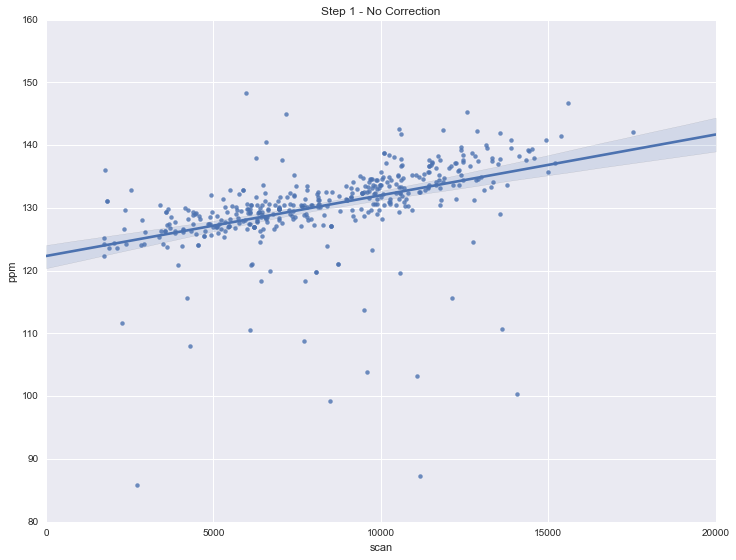

In [4]:
dta_file = '../data/20160528-BioGlyCMK-Lys-N14N15-Pool/rawXtractor/test-search/DTASelect-filter.txt'


plot_ppm_vs_scan(dta_file)
plt.title('Step 1 - No Correction');

Lets have a look at the ppm distribution of this first run

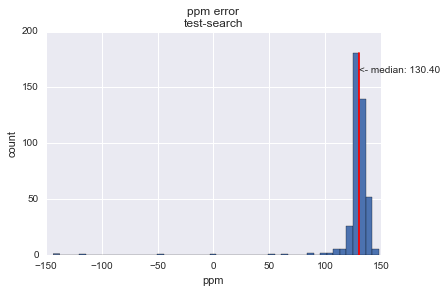

In [5]:
qc.plot_ppm(dta_file)

## Steps with peptide IDs after mass correction

In [4]:
dta_file = '../data/20160528-BioGlyCMK-Lys-N14N15-Pool/rawXtractor/corrected_search/DTASelect-filter.txt'

dta = list(blazmass_tools.dta_select_parser(dta_file))

dat = dict()
dat['scan'] = list(chain(*[[x['scan'] for x in locus['peptides']] for locus in dta]))
dat['ppm'] = list(chain(*[[x['PPM'] for x in locus['peptides']] for locus in dta]))
dat['lc_step'] = list(chain(*[[x['lc_step'] for x in locus['peptides']] for locus in dta]))


dat = pd.DataFrame(dat)

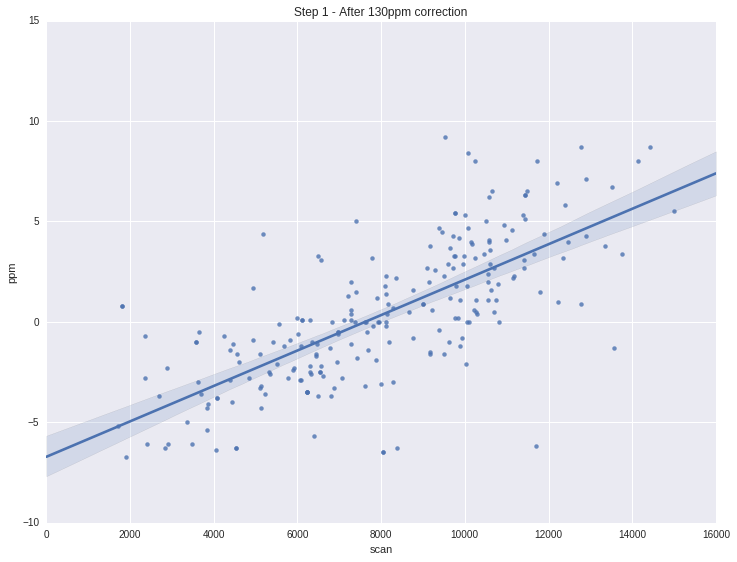

In [5]:
dat1 = dat.query('lc_step == 1')

# remove outliers
dat1 = dat1[~((dat1.ppm-dat1.ppm.mean()).abs()>2*dat1.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);
plt.title('Step 1 - After 130ppm correction');

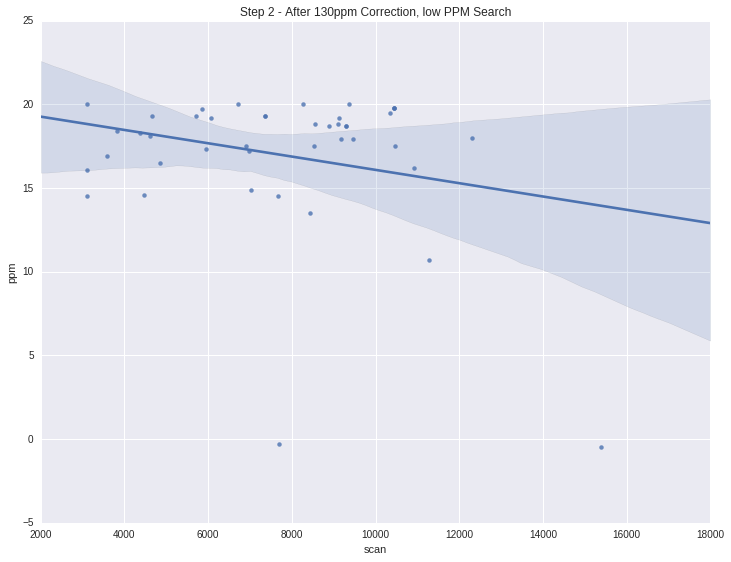

In [6]:
dat2 = dat.query('lc_step == 2')

# remove outliers
dat2 = dat2[~((dat2.ppm-dat2.ppm.mean()).abs()>2*dat2.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat.query('lc_step == 2')['scan'], dat.query('lc_step == 2')['ppm']);
plt.title('Step 2 - After 130ppm Correction, low PPM Search');

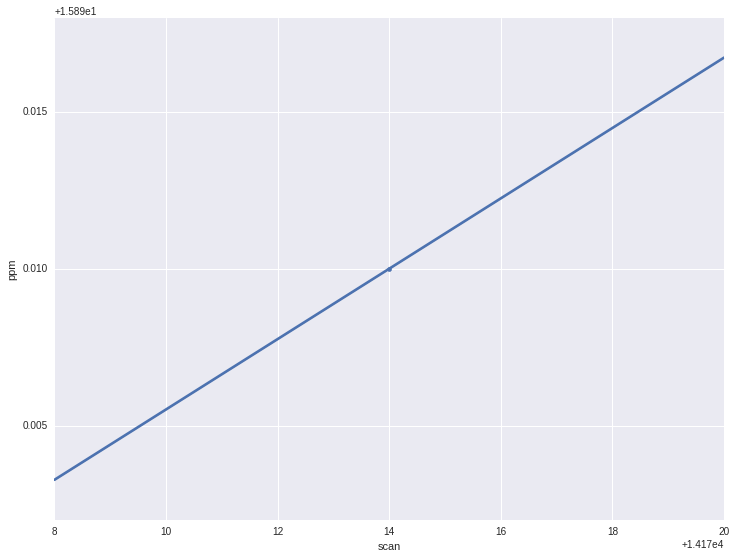

In [7]:
fig, ax = plt.subplots(figsize = (12, 9))
sns.regplot(dat.query('lc_step == 3')['scan'], dat.query('lc_step == 3')['ppm']);

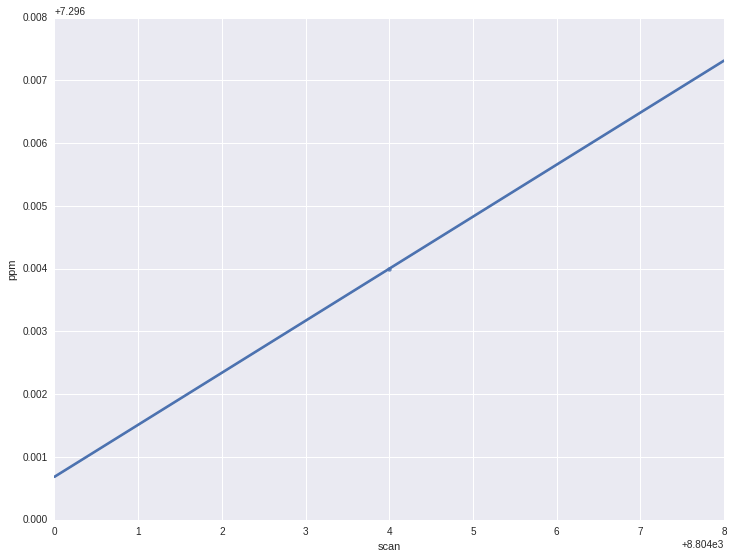

In [8]:
fig, ax = plt.subplots(figsize = (12, 9))
sns.regplot(dat.query('lc_step == 5')['scan'], dat.query('lc_step == 5')['ppm']);

## Step 2 and beyond after mass correction with high PPM Error

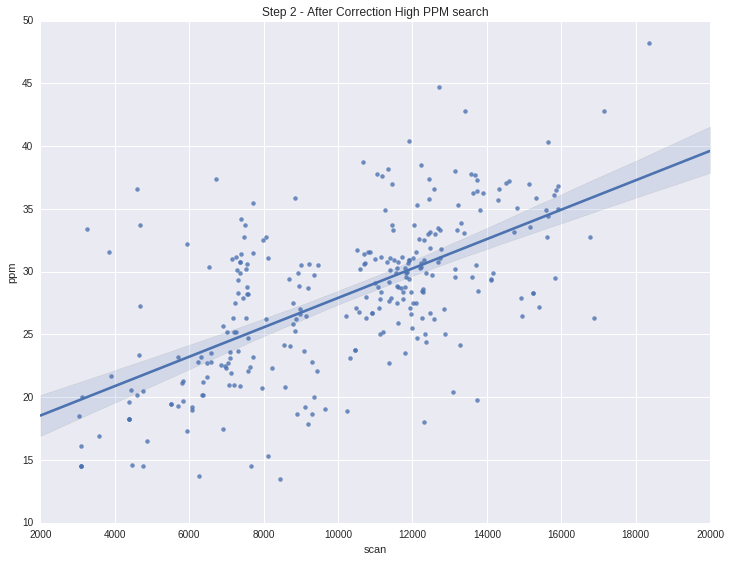

In [9]:
dta_file = '../data/20160528-BioGlyCMK-Lys-N14N15-Pool/rawXtractor/2nd-step/DTASelect-filter.txt'

plot_ppm_vs_scan(dta_file)
plt.title('Step 2 - After Correction High PPM search');

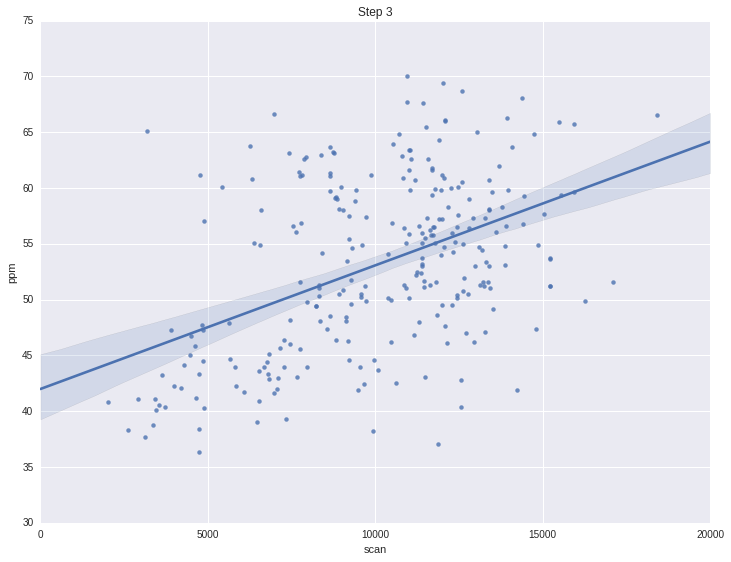

In [10]:
dta_file = '../data/20160528-BioGlyCMK-Lys-N14N15-Pool/rawXtractor/3rd-step/DTASelect-filter.txt'
plot_ppm_vs_scan(dta_file)
plt.title('Step 3');

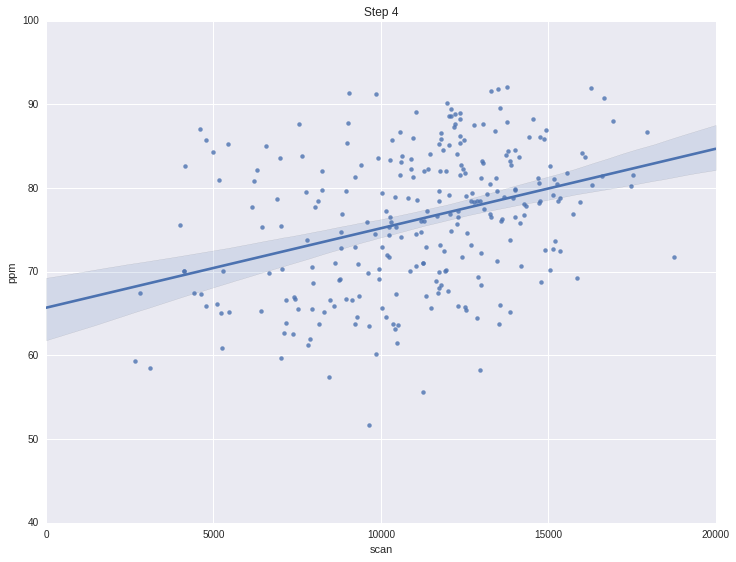

In [11]:
dta_file = '../data/20160528-BioGlyCMK-Lys-N14N15-Pool/rawXtractor/4th-step/DTASelect-filter.txt'
plot_ppm_vs_scan(dta_file)
plt.title('Step 4');

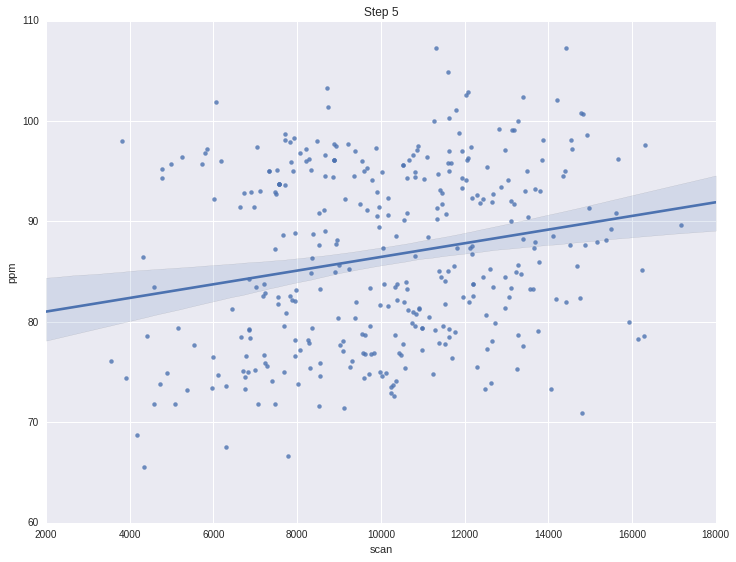

In [12]:
dta_file = '../data/20160528-BioGlyCMK-Lys-N14N15-Pool/rawXtractor/5th-step/DTASelect-filter.txt'
plot_ppm_vs_scan(dta_file)
plt.title('Step 5');

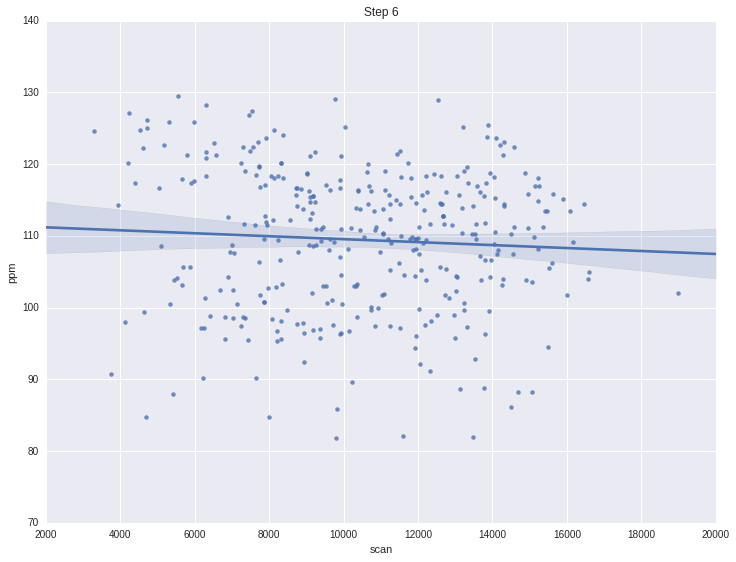

In [13]:
dta_file = '../data/20160528-BioGlyCMK-Lys-N14N15-Pool/rawXtractor/6th-step/DTASelect-filter.txt'
plot_ppm_vs_scan(dta_file)
plt.title('Step 6');

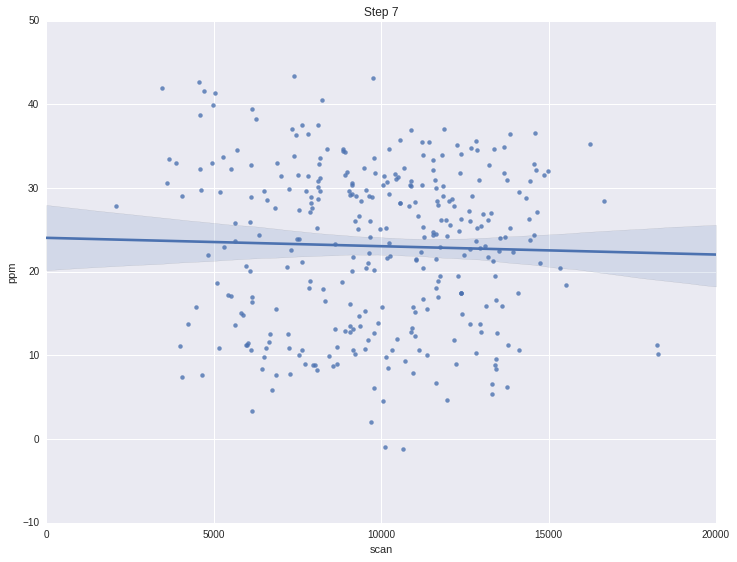

In [14]:
dta_file = '../data/20160528-BioGlyCMK-Lys-N14N15-Pool/rawXtractor/7th-step/DTASelect-filter.txt'
plot_ppm_vs_scan(dta_file)
plt.title('Step 7');

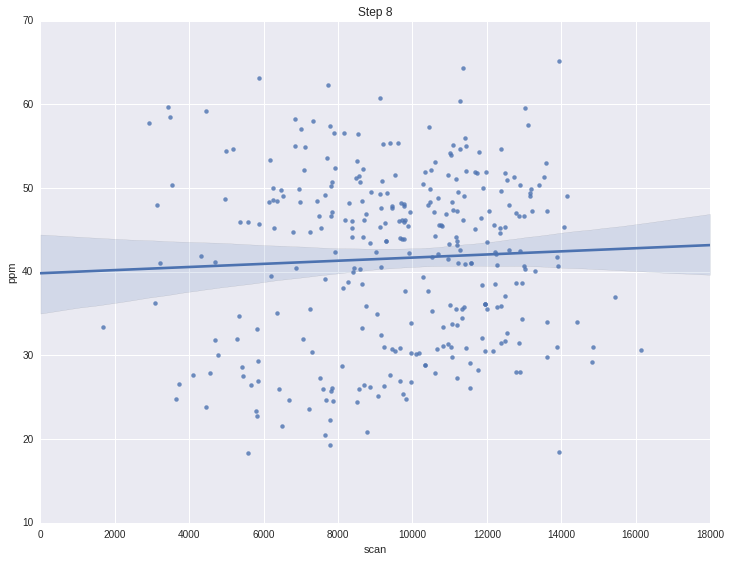

In [15]:
dta_file = '../data/20160528-BioGlyCMK-Lys-N14N15-Pool/rawXtractor/8th-step/DTASelect-filter.txt'
plot_ppm_vs_scan(dta_file)
plt.title('Step 8');

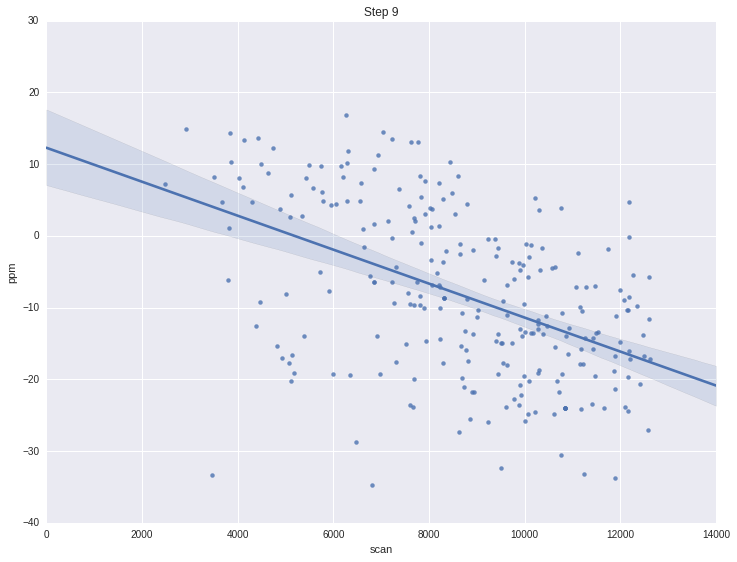

In [16]:
dta_file = '../data/20160528-BioGlyCMK-Lys-N14N15-Pool/rawXtractor/9th-step/DTASelect-filter.txt'
plot_ppm_vs_scan(dta_file)
plt.title('Step 9');

### Now that the files have been corrected for their ppm Error lets see how the new search looks

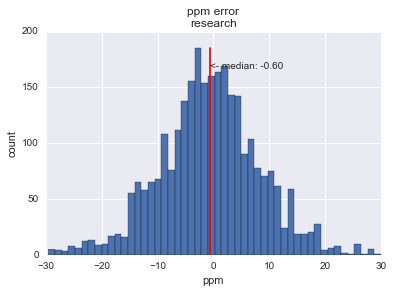

In [6]:
dta_file = '../data/20160528-BioGlyCMK-Lys-N14N15-Pool/rawXtractor/research/DTASelect-filter.txt'
qc.plot_ppm(dta_file)

In [7]:
dta = list(blazmass_tools.dta_select_parser(dta_file))

dat = dict()
dat['scan'] = list(chain(*[[x['scan'] for x in locus['peptides']] for locus in dta]))
dat['ppm'] = list(chain(*[[x['PPM'] for x in locus['peptides']] for locus in dta]))
dat['lc_step'] = list(chain(*[[x['lc_step'] for x in locus['peptides']] for locus in dta]))


dat = pd.DataFrame(dat)

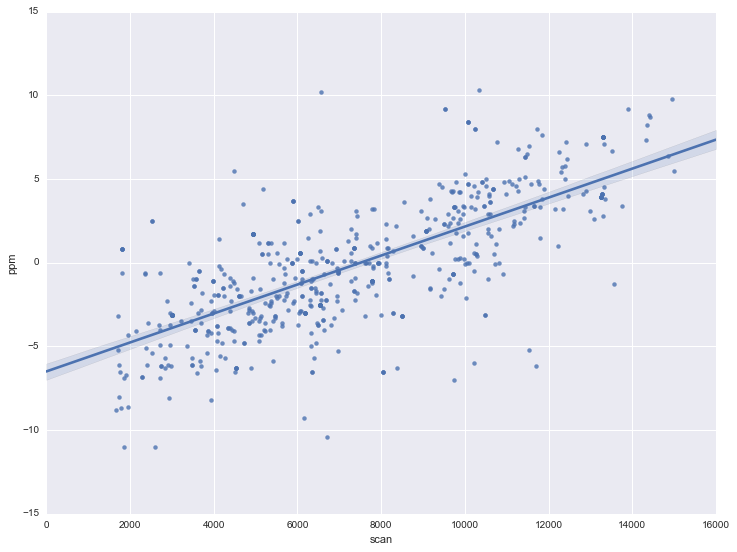

In [8]:
dat1 = dat.query('lc_step == 1')

# remove outliers
dat1 = dat1[~((dat1.ppm-dat1.ppm.mean()).abs()>2*dat1.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);

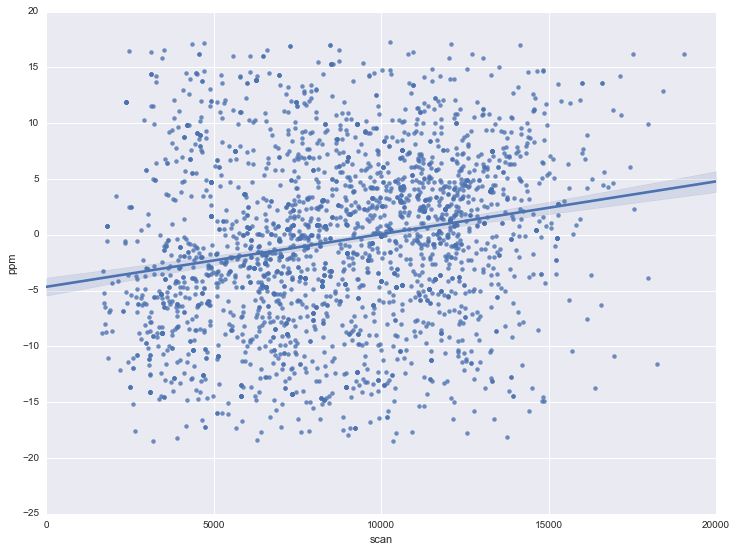

In [10]:
# remove outliers
dat1 = dat[~((dat.ppm-dat.ppm.mean()).abs()>2*dat.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);

## Lets look at a run that did really well - 3/31/2016 - Unenriched Fecal Lysate

In [12]:
dta_file = '../data/20160331-UnerFecal-Lys-N14N15-Pool/rawXtractor/dta-pfp-0.01/DTASelect-filter.txt'

dta = list(blazmass_tools.dta_select_parser(dta_file))

dat = dict()
dat['scan'] = list(chain(*[[x['scan'] for x in locus['peptides']] for locus in dta]))
dat['ppm'] = list(chain(*[[x['PPM'] for x in locus['peptides']] for locus in dta]))
dat['lc_step'] = list(chain(*[[x['lc_step'] for x in locus['peptides']] for locus in dta]))


dat = pd.DataFrame(dat)

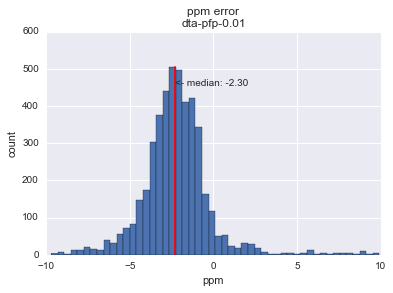

In [13]:
qc.plot_ppm(dta_file)

### Look at all of the LC steps indivudally from 1-11

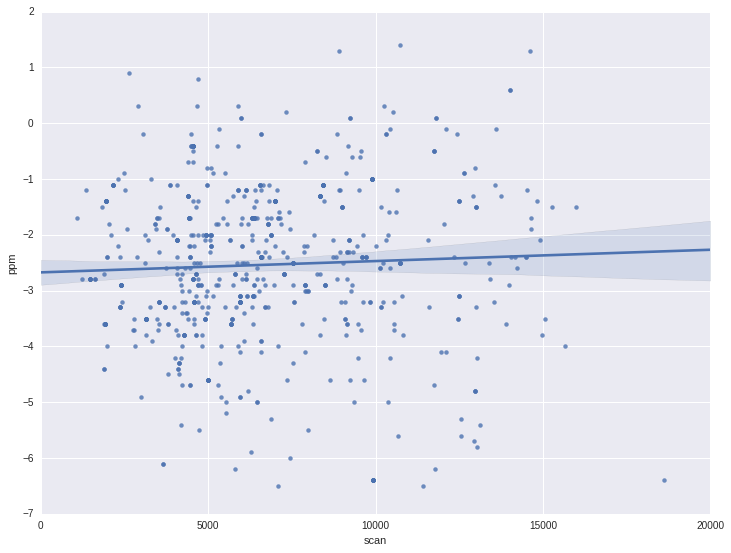

In [18]:
dat1 = dat.query('lc_step == 1')

# remove outliers
dat1 = dat1[~((dat1.ppm-dat1.ppm.mean()).abs()>2*dat1.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);

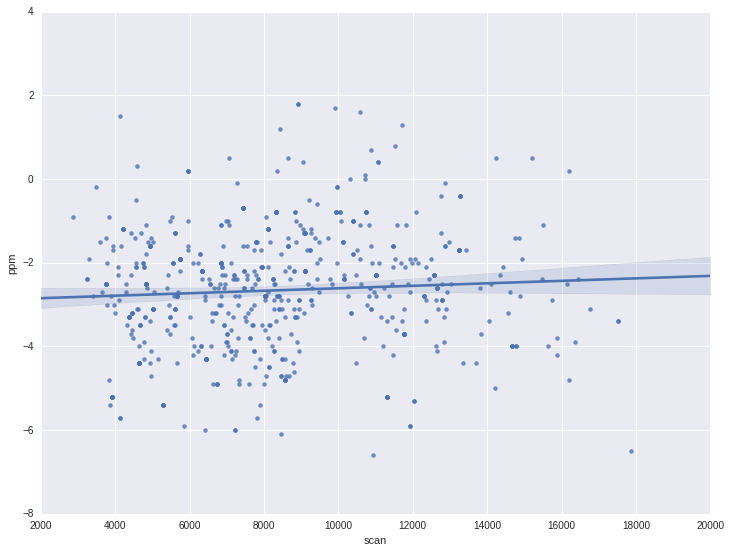

In [19]:
dat1 = dat.query('lc_step == 2')

# remove outliers
dat1 = dat1[~((dat1.ppm-dat1.ppm.mean()).abs()>2*dat1.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);

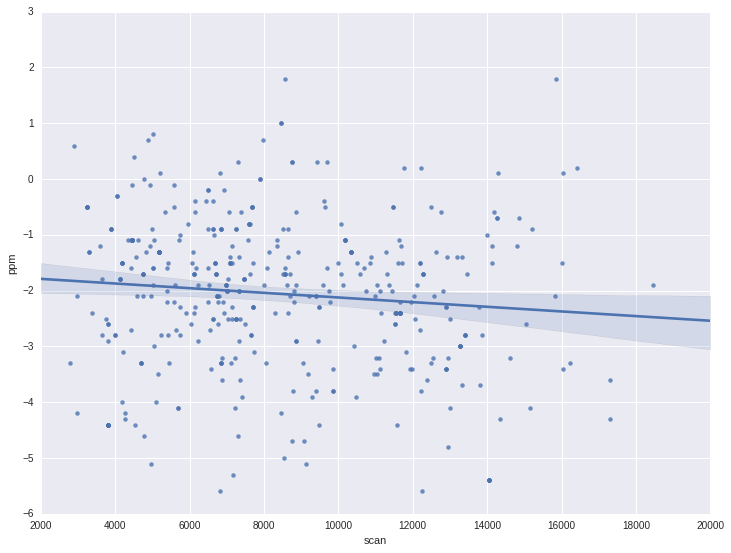

In [20]:
dat1 = dat.query('lc_step == 3')

# remove outliers
dat1 = dat1[~((dat1.ppm-dat1.ppm.mean()).abs()>2*dat1.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);

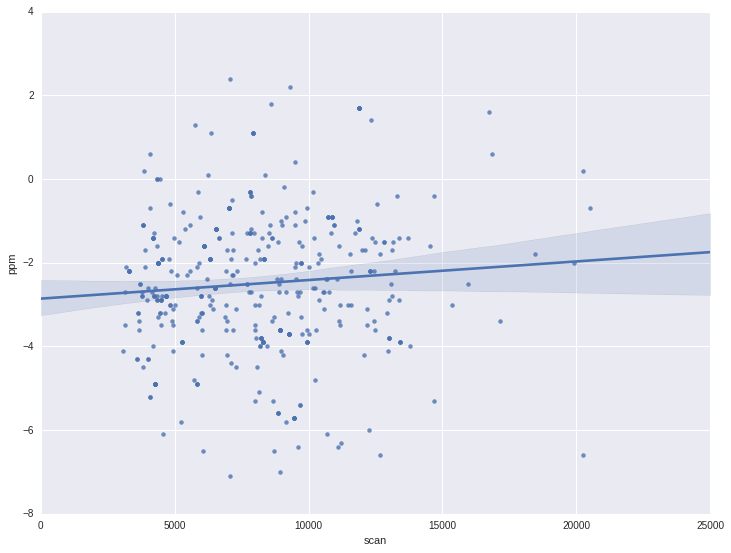

In [21]:
dat1 = dat.query('lc_step == 4')

# remove outliers
dat1 = dat1[~((dat1.ppm-dat1.ppm.mean()).abs()>2*dat1.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);

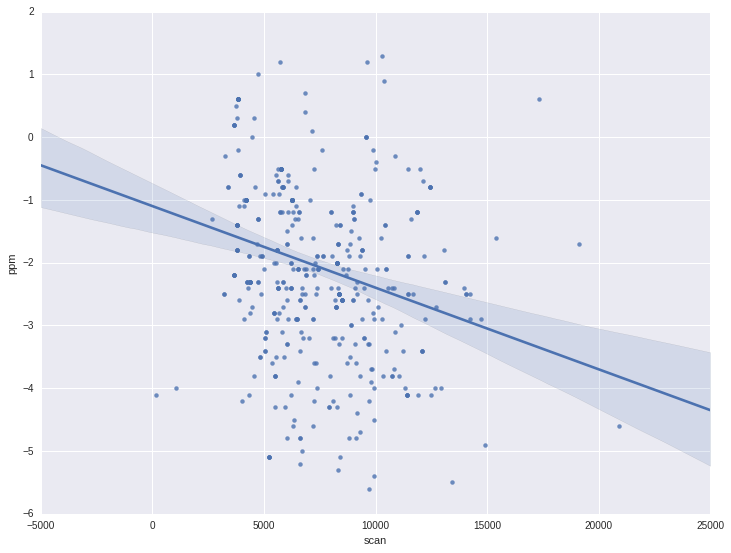

In [22]:
dat1 = dat.query('lc_step == 5')

# remove outliers
dat1 = dat1[~((dat1.ppm-dat1.ppm.mean()).abs()>2*dat1.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);

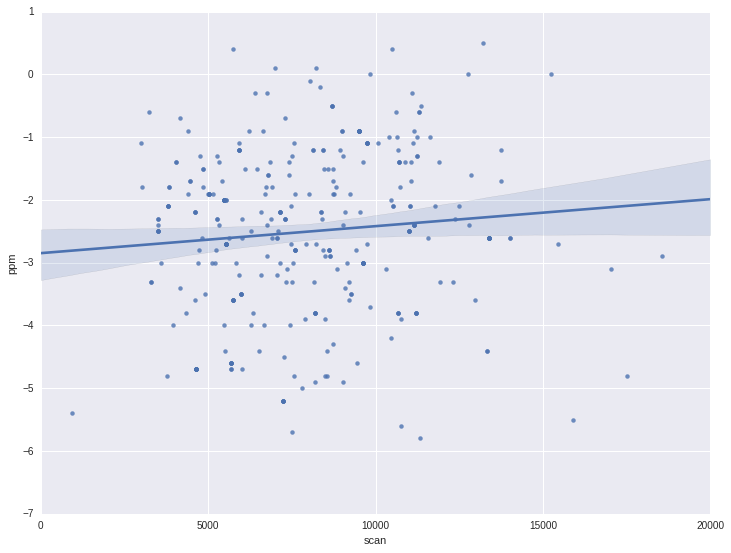

In [23]:
dat1 = dat.query('lc_step == 6')

# remove outliers
dat1 = dat1[~((dat1.ppm-dat1.ppm.mean()).abs()>2*dat1.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);

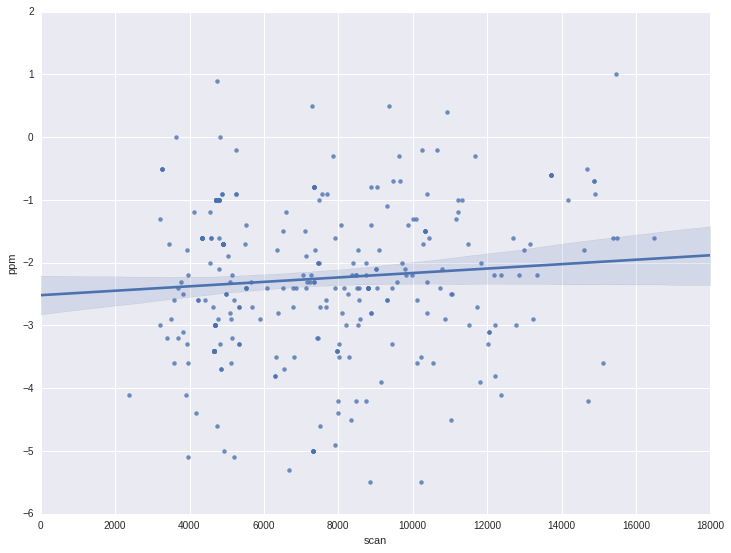

In [24]:
dat1 = dat.query('lc_step == 7')

# remove outliers
dat1 = dat1[~((dat1.ppm-dat1.ppm.mean()).abs()>2*dat1.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);

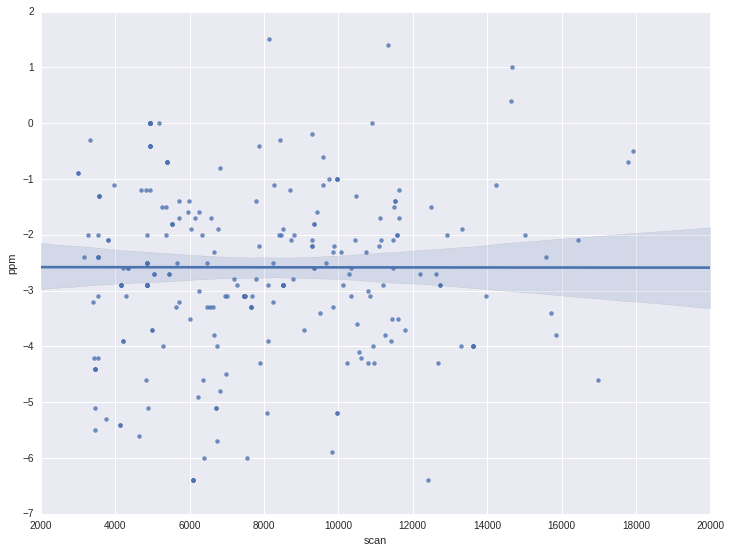

In [25]:
dat1 = dat.query('lc_step == 8')

# remove outliers
dat1 = dat1[~((dat1.ppm-dat1.ppm.mean()).abs()>2*dat1.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);

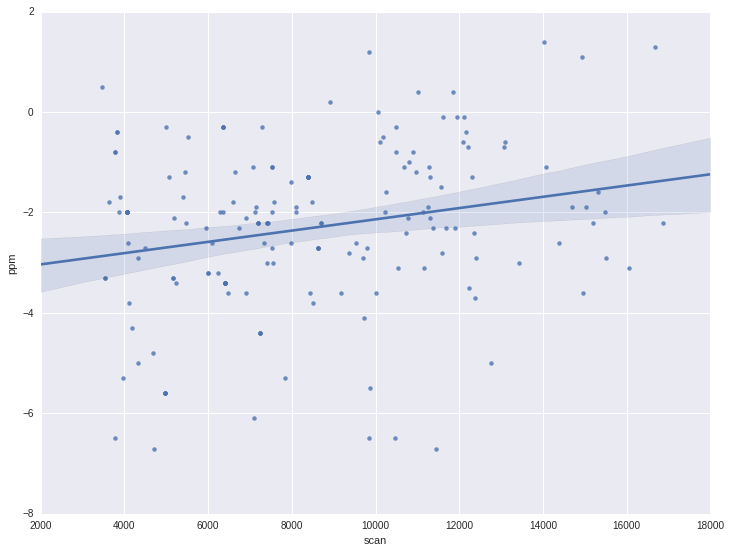

In [26]:
dat1 = dat.query('lc_step == 9')

# remove outliers
dat1 = dat1[~((dat1.ppm-dat1.ppm.mean()).abs()>2*dat1.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);

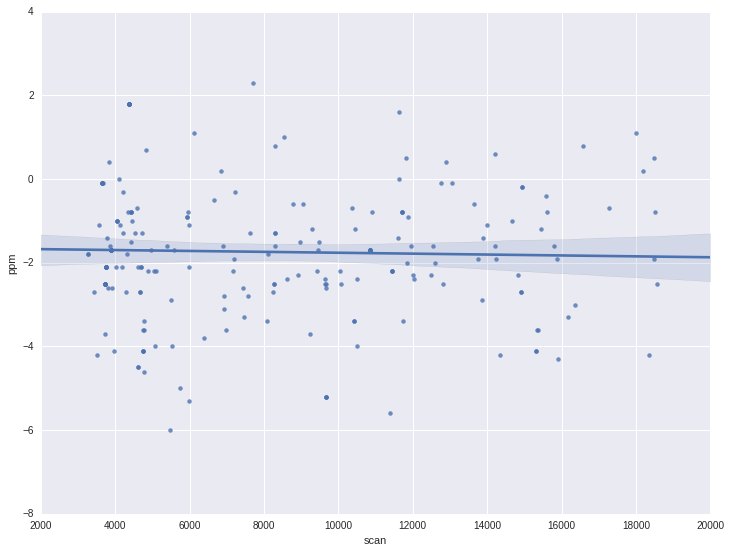

In [27]:
dat1 = dat.query('lc_step == 10')

# remove outliers
dat1 = dat1[~((dat1.ppm-dat1.ppm.mean()).abs()>2*dat1.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);

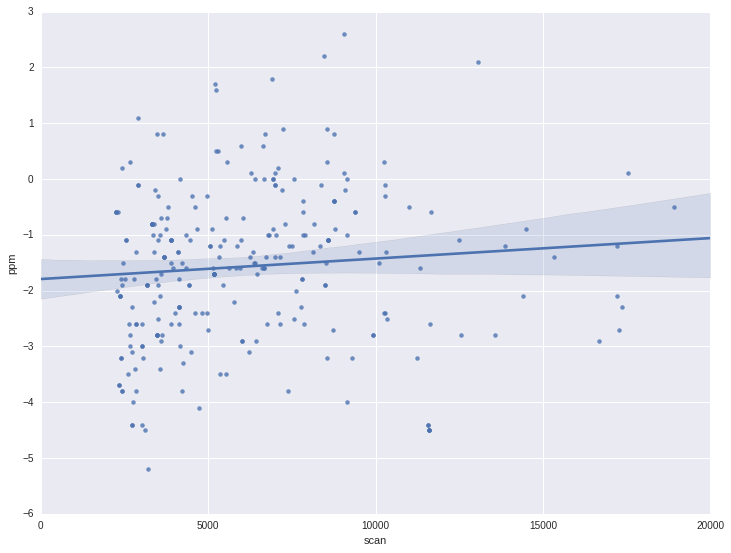

In [28]:
dat1 = dat.query('lc_step == 11')

# remove outliers
dat1 = dat1[~((dat1.ppm-dat1.ppm.mean()).abs()>2*dat1.ppm.std())]
fig, ax = plt.subplots(figsize = (12, 9))

sns.regplot(dat1.scan, dat1.ppm);

There seems to be some step to step variation, but it's on the order of about 1ppm over the course of 11 LC steps  